In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')
autos.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

# 2. Cleaning Column Names

In [4]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [5]:
autos.rename({
    'yearOfRegistration' : 'registration_year',
    'monthOfRegistration' : 'registration_month',
    'notRepairedDamage' : 'unrepaired_damage',
    'dateCreated' : 'ad_created',
}, axis = 1, inplace=True)

In [6]:
new_col_names = {}
def camel_snake(col):
    new_col_name = re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower()
    return new_col_name

In [7]:
for col in autos.columns:
    new_cname = camel_snake(col)
    new_col_names[col] = new_cname

In [8]:
autos.rename(new_col_names, axis=1, inplace=True)

- Changed all the camel case column names to snake style to make it more descriptive

# 3. Initial Exploration and Cleaning.

In [9]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-29 23:42:13,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [10]:
autos['offer_type'].value_counts(dropna=False)

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

- Columns to drop: nr_of_pictures
- Columns to further investigate: seller AND offer_type(1 type has a single record), 
- Numeric data stored as text: odometer and price

In [11]:
autos.drop(['nr_of_pictures','seller','offer_type'], axis=1, inplace=True)

In [12]:
pattern = '[km \$\,]'
autos['price_dollar'] = autos['price'].str.replace(pattern, '').astype(int)
autos['odometer_km'] = autos['odometer'].str.replace(pattern, '').astype(int)

# 4. Exploring the Odometer and Price Columns

In [13]:
autos[['price_dollar', 'odometer_km']].describe()

,price_dollar,odometer_km
count,5.000000e+04,50000.000000
mean,9.840044e+03,125732.700000
std,4.811044e+05,40042.211706
min,0.000000e+00,5000.000000
25%,1.100000e+03,125000.000000
50%,2.950000e+03,150000.000000
75%,7.200000e+03,150000.000000
max,1.000000e+08,150000.000000


### Price

In [14]:
autos['price_dollar'].nunique()

2357

In [15]:
print(autos['price_dollar'].value_counts().sort_index(ascending=True).head(20))
print(autos['price_dollar'].value_counts().sort_index(ascending=True).tail(20))

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price_dollar, dtype: int64
197000      1
198000      1
220000      1
250000      1
259000      1
265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
1234566     1
1300000     1
3890000     1
10000000    1
11111111    2
12345678    3
27322222    1
99999999    1
Name: price_dollar, dtype: int64


There are a number of listings with prices below \$30, including about 1,500 at $0. There are also a small number of listings with very high values, including 14 at around or over $1 million.

Given that eBay is an auction site, there could legitimately be items where the opening bid is $1. We will keep the $1 items, but remove anything above $350,000, since it seems that prices increase steadily to that number and then jump up to less realistic numbers.

In [16]:
autos = autos[autos['price_dollar'].between(1,350000)]
autos['price_dollar'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price_dollar, dtype: float64

### Odometer

In [17]:
autos['odometer_km'].describe()

count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

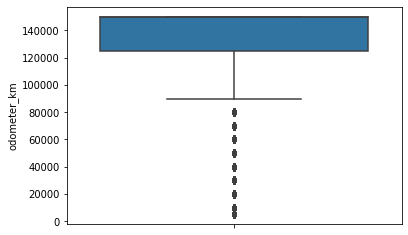

In [18]:
sns.boxplot(data=autos, y='odometer_km')
plt.show()

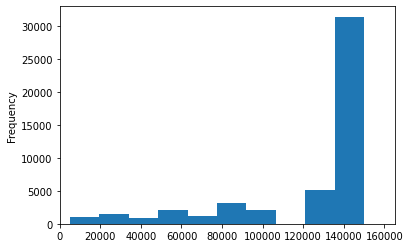

In [19]:
autos['odometer_km'].plot.hist()
plt.xlim(0,165000)
plt.show()

In [20]:
autos.loc[autos['odometer_km']<=80000, 'odometer_km'].value_counts()

80000    1415
70000    1217
60000    1155
50000    1012
5000      836
40000     815
30000     780
20000     762
10000     253
Name: odometer_km, dtype: int64

- We can see that the values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field. Additionally, there are more high mileage than low mileage vehicles.

# 5. Exploring the date columns

In [28]:
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

In [24]:
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

In [26]:
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

- date_crawled and last_seen cover ~30 days between the month of March and April in 2016
- ad_created convers almost a whole year beginning from May 2015 to April 2016

In [29]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

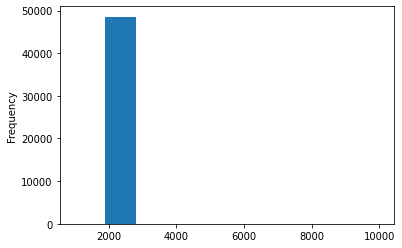

In [30]:
autos['registration_year'].plot.hist()
plt.show()

In [36]:
autos['registration_year'].value_counts(normalize=True).sort_index().head(20)*100

1000    0.002059
1001    0.002059
1111    0.002059
1800    0.004118
1910    0.010295
1927    0.002059
1929    0.002059
1931    0.002059
1934    0.004118
1937    0.008236
1938    0.002059
1939    0.002059
1941    0.004118
1943    0.002059
1948    0.002059
1950    0.006177
1951    0.004118
1952    0.002059
1953    0.002059
1954    0.004118
Name: registration_year, dtype: float64

- There is a lot of erroneous values in the registration year. Give that the firt car was invented in January 1886, we can very well exclude any year before 1886 (< 1910).
- We can also exclude years with registration year dated in the future. For example - 5911, 6200, 9999 etc. Since a car cannot be registered after it has been listed, we can remove all vehicles that have registration year above 2016.

In [40]:
(autos.loc[(autos['registration_year']>1900) & (autos['registration_year']<=2016)].shape[0])/50000

0.93362

- Even after removing values outside the upper(1900) and lower(2016) bounds, we are able to retain ~93% of the data

In [43]:
autos = autos.loc[(autos['registration_year']>1900) & (autos['registration_year']<=2016)]

In [52]:
autos['registration_year'].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

# 7. Exploring Price by Brand

In [53]:
autos['brand'].nunique()

40

In [62]:
autos['brand'].value_counts(normalize=True).iloc[:6]*100

volkswagen       21.126368
bmw              11.004477
opel             10.758124
mercedes_benz     9.646323
audi              8.656627
ford              6.989996
Name: brand, dtype: float64

- The brands volkswagen, bmw, opel, mercedes_benz, audi and ford cover ~68% of the dataset.
- Each of them have more than 5% market share for this dataset.

In [78]:
autos[autos['brand'].isin(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'])].groupby('brand')['price_dollar'].agg(np.mean).sort_values(ascending=False)

brand
audi             9336.687454
mercedes_benz    8628.450366
bmw              8332.820518
volkswagen       5402.410262
ford             3749.469507
opel             2975.241935
Name: price_dollar, dtype: float64

- Audi, Mecedes Benz and BMW are more expensive on an average.
- Volkswagen and Ford have a decent price (not too expensive or cheap) 
- Opel have the cheapest cars on average.

# 8. Storing Aggregate Data in a DataFrame

In [83]:
top_6 = autos[autos['brand'].isin(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'])].groupby('brand')['price_dollar','odometer_km'].agg(np.mean).reset_index()

/Users/ravirajkakati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


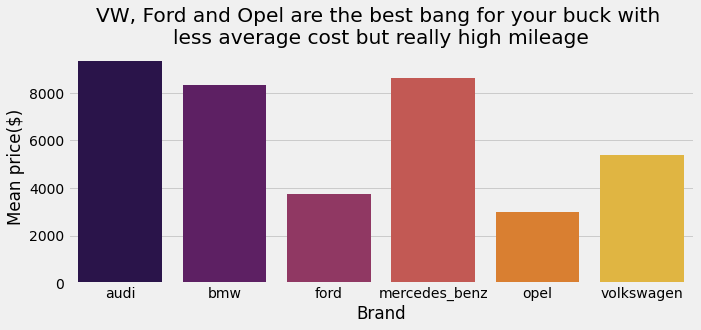

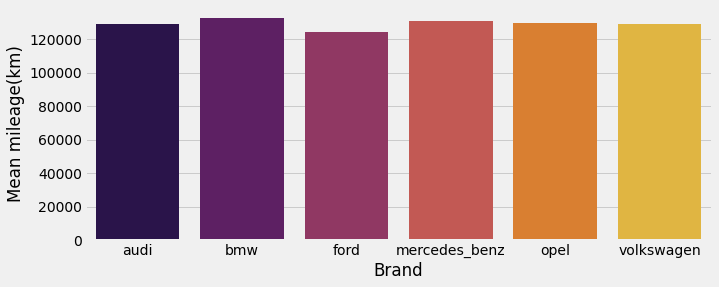

In [124]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,4)
sns.barplot(data=top_6, x='brand', y='price_dollar',palette="inferno")
plt.title('VW, Ford and Opel are the best bang for your buck with \nless average cost but really high mileage')
plt.xlabel('Brand')
plt.ylabel('Mean price($)')
plt.show()
sns.barplot(data=top_6, x='brand', y='odometer_km', palette="inferno")
plt.xlabel('Brand')
plt.ylabel('Mean mileage(km)')
plt.show()